In [2]:
import numpy as np
import pandas as pd

# Data Visualization 

In [3]:
# Data Inspection
data = pd.read_csv("dataset.csv")
print(data.head(10))
print()
print('*' * 10, "data description", '*' * 10)
print(data.info())
print()
print('*' * 10, "numerical attributes", '*' * 10)
print(data.describe())
print('*' * 10, "Check missing value", '*' * 10)
print(data.isnull().sum())

   Gender  Age  Height(cm)  Weight(kg) Family_history Alcohol Junk_food  \
0  Female   42       172.2        82.9             no     low       yes   
1  Female   19       175.3        80.0            yes    none       yes   
2  Female   43       158.3        81.9            yes    none       yes   
3  Female   23       165.0        70.0            yes     low        no   
4    Male   23       169.0        75.0            yes     low       yes   
5    Male   23       172.0        82.0            yes     low       yes   
6  Female   21       172.0       133.9            yes     low       yes   
7    Male   21       172.5        82.3            yes     low       yes   
8  Female   19       165.0        82.0            yes    none       yes   
9    Male   22       187.1        89.3            yes     low       yes   

   Vege_day  Meals_day      Snack Smoking  Water_intake(L) Transportation  \
0         3          3  Sometimes      no             2.72            car   
1         2         

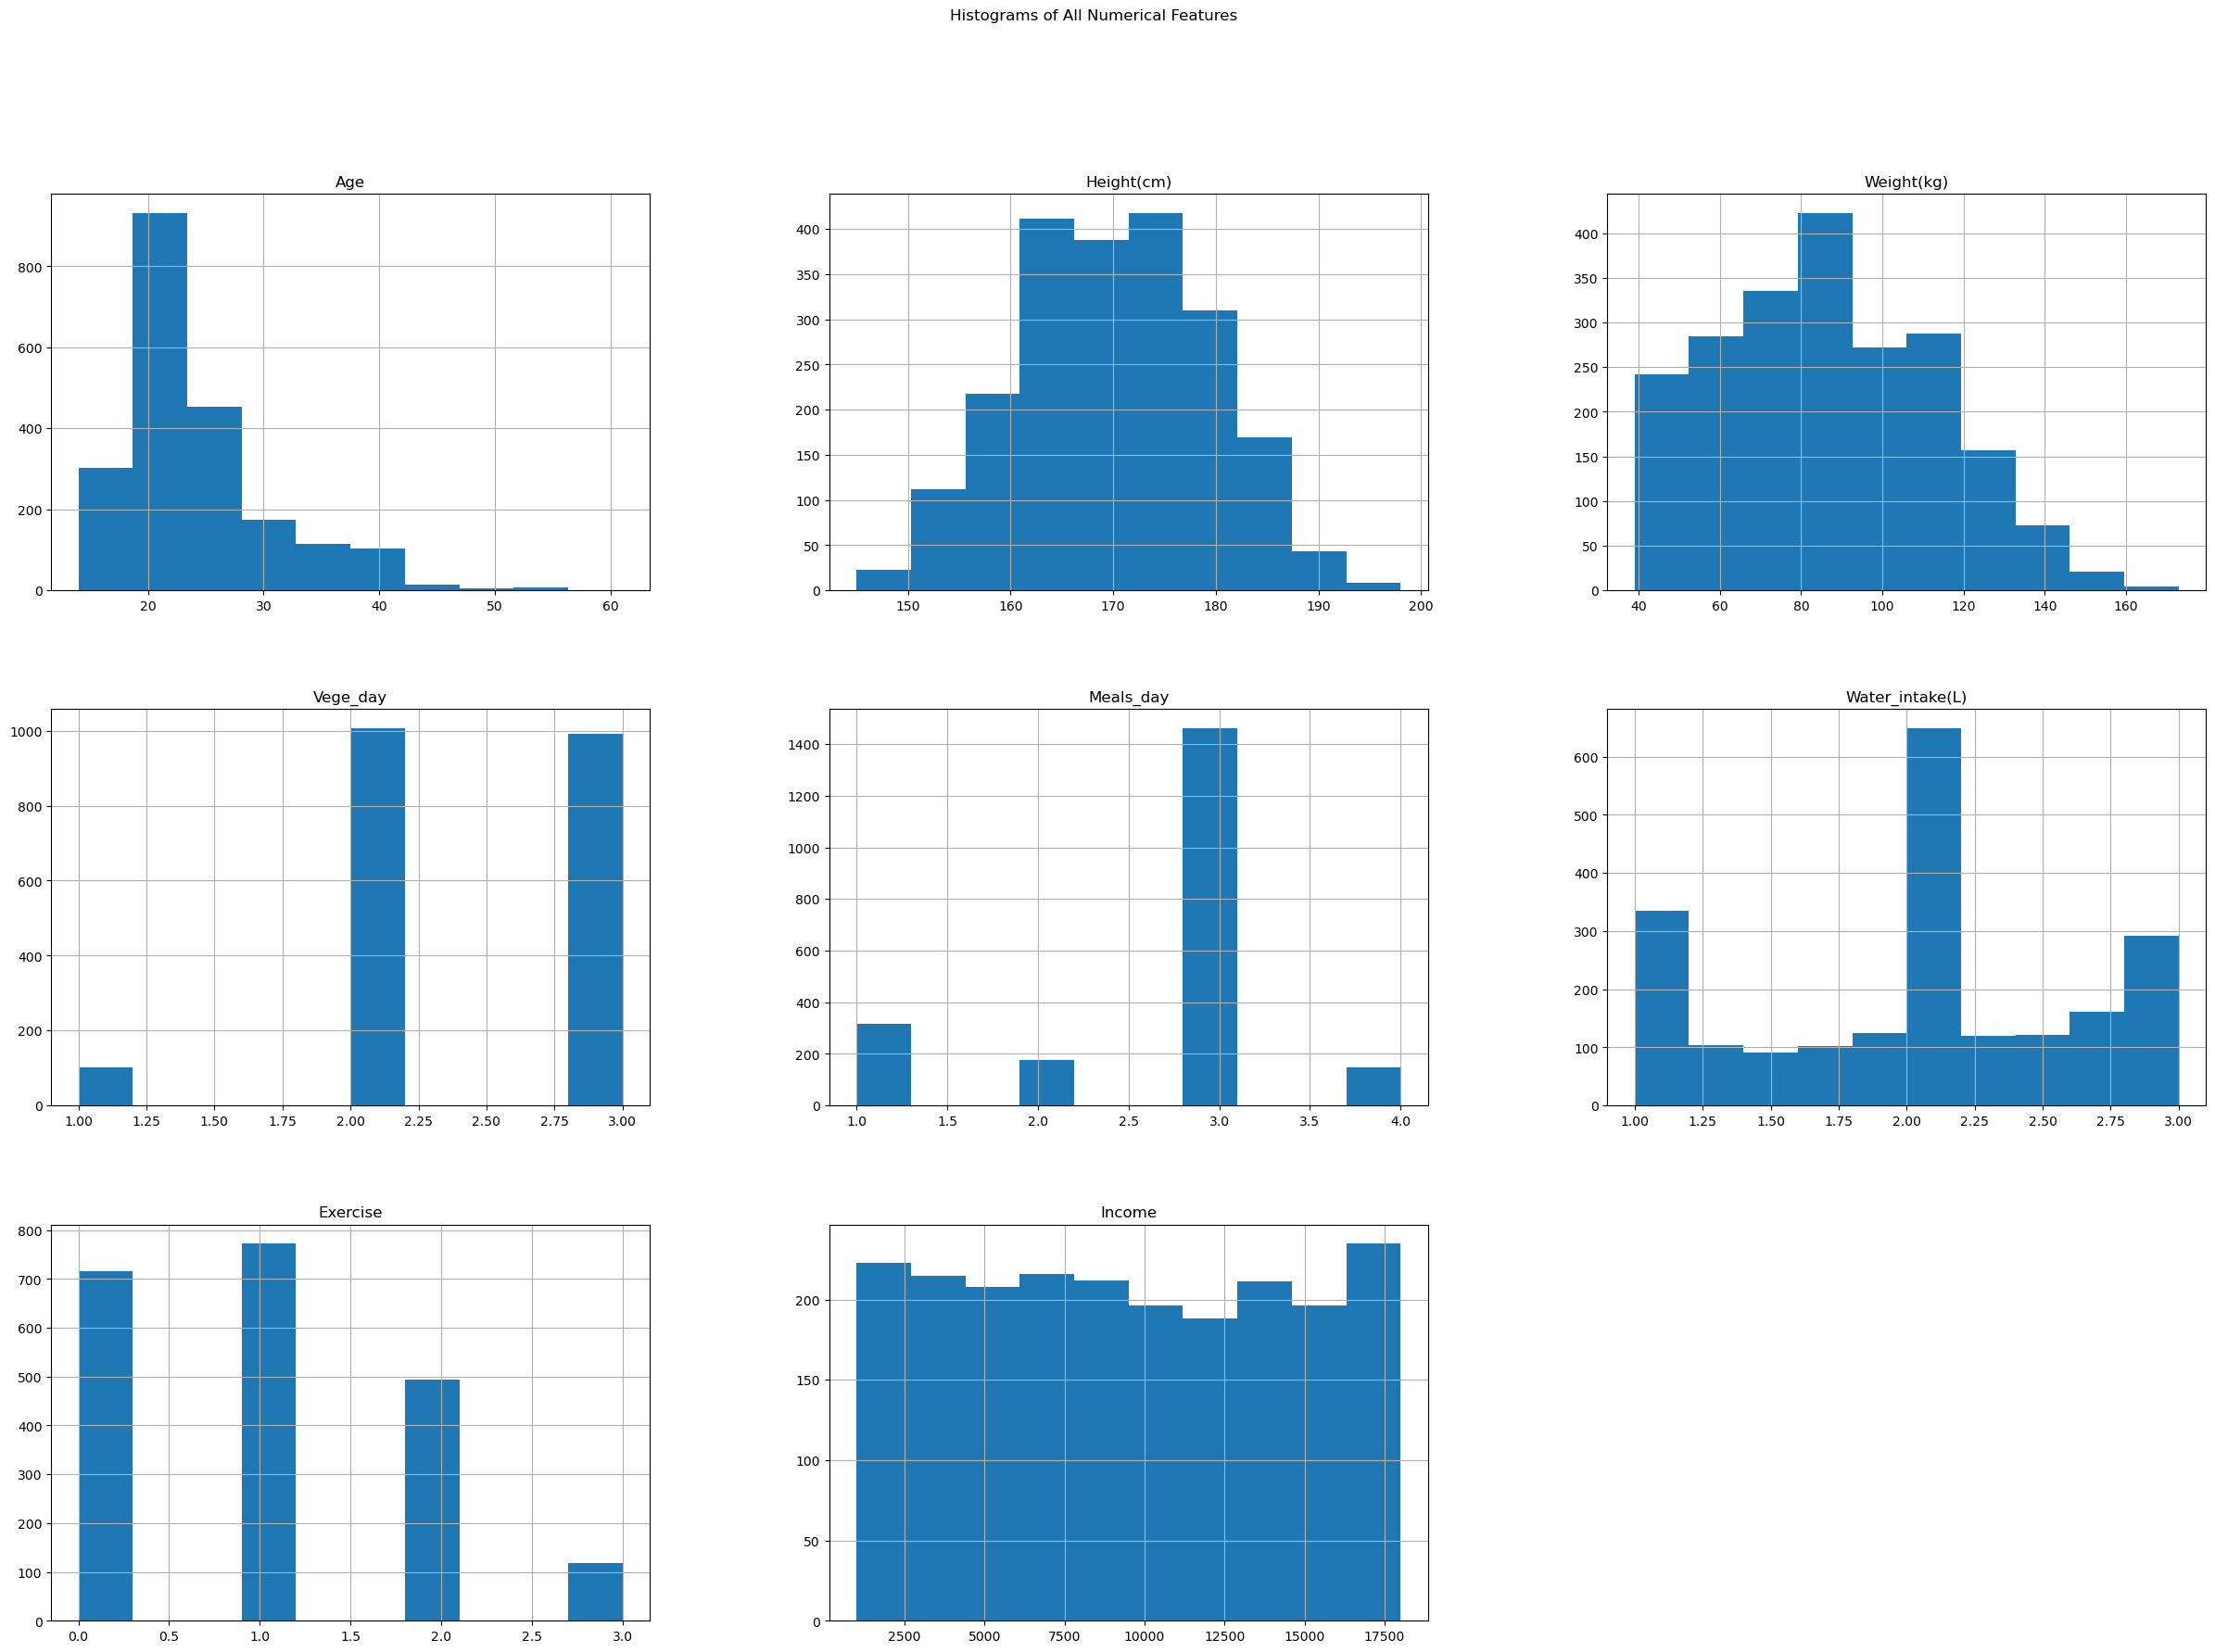

In [4]:
# Data Exploration and Visualization
import matplotlib.pyplot as plt

# Distribution of a numerical feature (e.g., Age)
data.hist(figsize=(30, 20))
plt.suptitle('Histograms of All Numerical Features')
plt.show()

# Preprocessing Data

X shape: (2100, 17)
y shape: (2100,)

Cardiovascular_risk(y)
high      967
medium    576
low       557
Name: count, dtype: int64


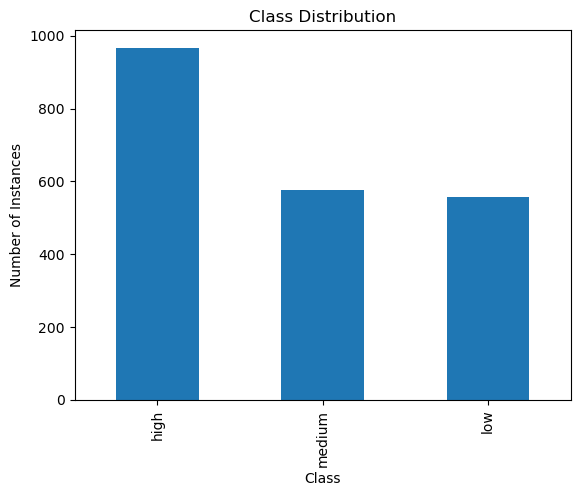

In [5]:
# Separating the output from input
X = data.drop('Cardiovascular_risk(y)', axis=1)
y = data['Cardiovascular_risk(y)']

print("X shape:", X.shape)
print("y shape:", y.shape)

print()
class_distribution = y.value_counts()
print(class_distribution)
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()

In [6]:
# split the dataset into test and training set (stratified sampling)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X shape:", X.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X shape: (2100, 17)
X_train shape: (1680, 17)
X_test shape: (420, 17)


In [7]:
# Preprocess train data
# Split the input matrix into numerical and categorical sets
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.drop(X_train_cat.columns, axis=1)

# Standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_train_num)       
X_train_num_scaled = scaler.transform(X_train_num)

# One-hot encode multiple categorical data
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
X_train_cat_encoded = one_hot_encoder.fit_transform(X_train_cat)

print('X_train_num_scaled shape:', X_train_num_scaled.shape)
print('X_train_cat_encoded shape:', X_train_cat_encoded.shape)

# combine the transformed numerical and categorical sets
X_train_final = np.hstack([X_train_num_scaled, X_train_cat_encoded])
y_train = np.array(y_train)  #convert to numpy array

print('X_train_final shape:', X_train_final.shape)
print('y_train shape:', y_train.shape)

X_train_num_scaled shape: (1680, 8)
X_train_cat_encoded shape: (1680, 26)
X_train_final shape: (1680, 34)
y_train shape: (1680,)


# Model Training

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean', weights='distance')
knn.fit(X_train_final, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=20, weights='distance')

In [9]:
y_train_pred = knn.predict(X_train_final)

# Model Evaluation

In [10]:
def show10results(y_train, y_pred):
    print('Result for the 10 random samples:')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:<15}  pred = {:<15}'.format(y_train[i], y_pred[i]))

#result for the model without any cross validation
show10results(y_train, y_train_pred) 

Result for the 10 random samples:
actual = low              pred = low            
actual = high             pred = high           
actual = medium           pred = medium         
actual = medium           pred = medium         
actual = low              pred = low            
actual = medium           pred = medium         
actual = low              pred = low            
actual = low              pred = low            
actual = high             pred = high           
actual = medium           pred = medium         


Training Accuracy: 1.000000
Training Classification Report: 
              precision    recall  f1-score   support

        high     1.0000    1.0000    1.0000       787
         low     1.0000    1.0000    1.0000       439
      medium     1.0000    1.0000    1.0000       454

    accuracy                         1.0000      1680
   macro avg     1.0000    1.0000    1.0000      1680
weighted avg     1.0000    1.0000    1.0000      1680

Training Confusion Matrix: 
[[787   0   0]
 [  0 439   0]
 [  0   0 454]]


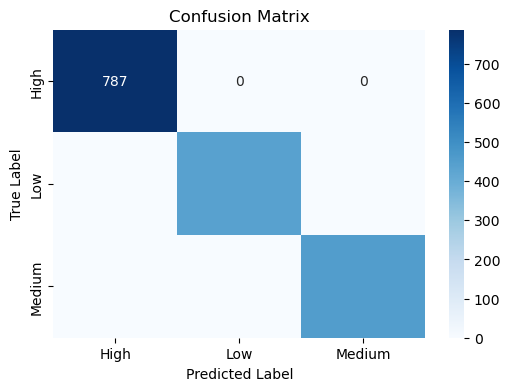

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#evaluation before cross validation

#accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.6f}")

#Classification report
print("Training Classification Report: ")
print(classification_report(y_train, y_train_pred, digits=4))

#Confusion matrix
import seaborn as sns
print("Training Confusion Matrix: ")
conf_matrix = confusion_matrix(y_train, y_train_pred)

print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Cross-validated accuracy scores: [0.86011905 0.83035714 0.82738095 0.82440476 0.82738095]
Average accuracy: 0.833929
Cross-validation Classification Report:
              precision    recall  f1-score   support

        high     0.8370    0.9720    0.8995       787
         low     0.9368    0.7426    0.8285       439
      medium     0.7416    0.6828    0.7110       454

    accuracy                         0.8339      1680
   macro avg     0.8385    0.7992    0.8130      1680
weighted avg     0.8373    0.8339    0.8300      1680

Cross-validation Confusion Matrix:

[[765   4  18]
 [ 23 326  90]
 [126  18 310]]



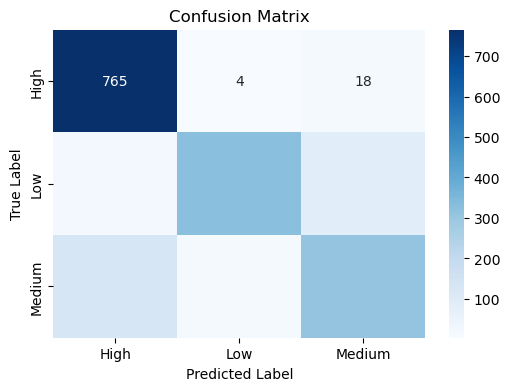

In [12]:
#Evaluation with cross validation

from sklearn.model_selection import cross_val_score, cross_val_predict

def evaluate_training(model, X_train, y_train, cv=5):
    k_scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=cv)
    print(f"Cross-validated accuracy scores: {k_scores}")
    print(f"Average accuracy: {k_scores.mean():.6f}")

    # Perform cross-validated predictions
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)
    
    print("Cross-validation Classification Report:")
    print(classification_report(y_train, y_pred_cv, digits=4))
    
    print("Cross-validation Confusion Matrix:")
    conf_matrix = confusion_matrix(y_train, y_pred_cv)

    print()
    print(conf_matrix)
    print()
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_training(knn, X_train_final, y_train)

# Fine Tuning

In [13]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"n_neighbors": list(range(5,2001)), "weights": ['distance'], "metric": ['euclidean']} 

knn1 = KNeighborsClassifier()

random_search = RandomizedSearchCV(knn1, param_distributions=param_dist, n_iter=1200, cv=5, scoring='f1_macro')

random_search.fit(X_train_final, y_train)
print('done')


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

done


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.53633511        nan 0.5865224  ... 0.21729638        nan 0.33028451]
  warnings.warn(


In [17]:
best_model = random_search.best_estimator_

print(best_model)
print("Best parameter:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

KNeighborsClassifier(metric='euclidean', weights='distance')
Best parameter: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'euclidean'}
Best cross-validation score: 0.8505752907185107


Cross-validated accuracy scores: [0.89285714 0.85714286 0.87202381 0.8452381  0.86607143]
Average accuracy: 0.866667
Cross-validation Classification Report:
              precision    recall  f1-score   support

        high     0.8847    0.9657    0.9235       787
         low     0.9370    0.7790    0.8507       439
      medium     0.7763    0.7797    0.7780       454

    accuracy                         0.8667      1680
   macro avg     0.8660    0.8415    0.8507      1680
weighted avg     0.8691    0.8667    0.8652      1680

Cross-validation Confusion Matrix:

[[760   2  25]
 [ 20 342  77]
 [ 79  21 354]]



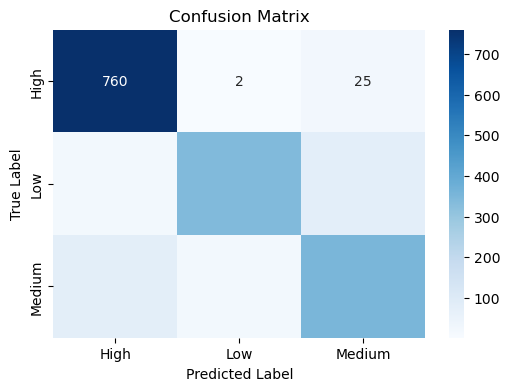

In [18]:
# Results evaluation after fine tuning
evaluate_training(best_model, X_train_final, y_train)

# Testing

### KNN result without fine tuning

In [19]:
# Preprocess the test set
X_test_cat  = X_test.select_dtypes(include=['object'])
X_test_num = X_test.drop(X_train_cat.columns, axis=1)

# Standardize numeric data
X_test_num_scaled = scaler.transform(X_test_num)

# One-hot encode multiple categorical data
X_test_cat_encoded = one_hot_encoder.transform(X_test_cat)

# combine the transformed numerical and categorical sets
X_test_final = np.hstack([X_test_num_scaled, X_test_cat_encoded])
y_test = np.array(y_test)  #convert to numpy array

print('X_test_num_scaled shape:', X_test_num_scaled.shape)
print('y_test_cat_encoded shape:', X_test_cat_encoded.shape)
print('X_test_final shape:', X_test_final.shape)
print('y_test shape:', y_test.shape)

X_test_num_scaled shape: (420, 8)
y_test_cat_encoded shape: (420, 26)
X_test_final shape: (420, 34)
y_test shape: (420,)


Test Set Classification Report:
              precision    recall  f1-score   support

        high     0.8621    0.9722    0.9138       180
         low     0.9022    0.7034    0.7905       118
      medium     0.7280    0.7459    0.7368       122

    accuracy                         0.8310       420
   macro avg     0.8307    0.8072    0.8137       420
weighted avg     0.8344    0.8310    0.8278       420

Test Set Confusion Matrix:

[[175   1   4]
 [  5  83  30]
 [ 23   8  91]]



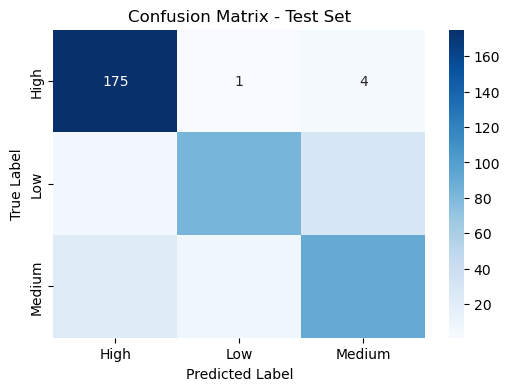

In [20]:
# evaluate on the test set

def evaluate_test_model(model, X_test, y_test):
    
    # Perform predictions on the test set
    y_pred = model.predict(X_test)

    # Print classification report
    print("Test Set Classification Report:")
    print(classification_report(y_test, y_pred, digits=4)) 

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Test Set Confusion Matrix:")
    print()
    print(conf_matrix)
    print()
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

evaluate_test_model(knn, X_test_final, y_test)

### KNN Best Model result after fine tuning

Test Set Classification Report:
              precision    recall  f1-score   support

        high     0.9171    0.9833    0.9491       180
         low     0.9231    0.7119    0.8038       118
      medium     0.7647    0.8525    0.8062       122

    accuracy                         0.8690       420
   macro avg     0.8683    0.8492    0.8530       420
weighted avg     0.8745    0.8690    0.8668       420

Test Set Confusion Matrix:

[[177   1   2]
 [  4  84  30]
 [ 12   6 104]]



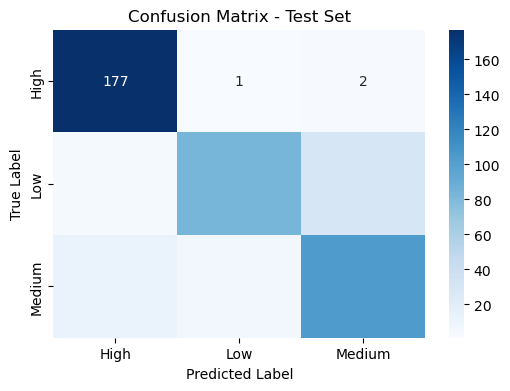

In [21]:
evaluate_test_model(best_model, X_test_final, y_test)

# Precision-Recall Curve and ROC curve 

In [35]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

def plot_graphs_knn(model, X_train_final, y_train, desire_recall=0.80):
    # Binarize y_train for multiclass classification (convert to binary labels for each class)
    classes = np.unique(y_train)
    
    # Get predicted probabilities using cross_val_predict with method "predict_proba"
    y_scores_cv = cross_val_predict(model, X_train_final, y_train, cv=5, method="predict_proba")

    thresholds_dict = {}

    plt.figure(figsize=(8, 6)) 
    
    for i, class_label in enumerate(classes):
        # Extract the probabilities for the current class (i-th column corresponds to the i-th class)
        y_scores_class = y_scores_cv[:, i]
        
        # Binarize y_train for the current class (1 for the class, 0 for the others)
        y_train_bin = (y_train == class_label).astype(int)
        
        # Precision-recall curve for each class (class vs not class)
        precision, recall, thresholds = precision_recall_curve(y_train_bin, y_scores_class)

        # Finding threshold where recall is greater than or equal to the desired recall
        valid_indices = np.where(recall >= desire_recall)[0]

        #to handle the case where multiple threshold able to excedd the desired recall
        if len(valid_indices) > 0:
            best_idx = valid_indices[np.argmax(precision[valid_indices])]  #choose the one with highest precision
            selected_threshold = thresholds[best_idx]
        else:  #when no threshold meets the desired recall
            selected_threshold = 0.51  

        # Store the threshold for the current class
        thresholds_dict[class_label] = selected_threshold
        
        # Print precision, recall, and selected threshold for the class
        print(f"Selected threshold for {class_label.capitalize()}: {selected_threshold:.4f}")
        print(f"Precision at selected threshold: {precision[np.argmax(thresholds == selected_threshold)]:.4f}")
        print(f"Recall at selected threshold: {recall[np.argmax(thresholds == selected_threshold)]:.4f}")
        print()
        
        # Plot precision-recall curve
        plt.plot(recall, precision, lw=2, label=f'{class_label.capitalize()} vs Rest')
    
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision-Recall Curve for Each Class', fontsize=16)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(8, 6))

    auc = []
    for i, class_label in enumerate(classes):
        # Extract the predicted probabilities for the current class (i-th column corresponds to the i-th class)
        y_scores_class = y_scores_cv[:, i]
        
        # Binarize y_train for the current class (1 for the class, 0 for the others)
        y_train_bin = (y_train == class_label).astype(int)

        # ROC curve for each class (class vs not class)
        fpr, tpr, thresholds = roc_curve(y_train_bin, y_scores_class)

        auc.append(roc_auc_score(y_train_bin, y_scores_class))
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'{class_label.capitalize()} vs Rest')
    
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('ROC Curve for Each Class', fontsize=16)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.show()

    # Print AUC scores for each class
    for i, class_label in enumerate(classes):
        print(f'AUC for {class_label.capitalize()} vs Rest: {auc[i]:.4f}')

    return thresholds_dict

Selected threshold for High: 0.7263
Precision at selected threshold: 0.9784
Recall at selected threshold: 0.8056

Selected threshold for Low: 0.3567
Precision at selected threshold: 0.9167
Recall at selected threshold: 0.8018

Selected threshold for Medium: 0.3906
Precision at selected threshold: 0.6913
Recall at selected threshold: 0.8040



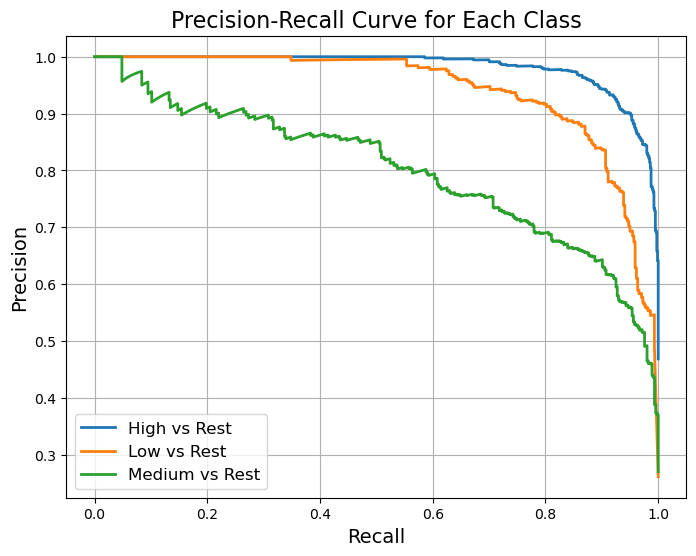

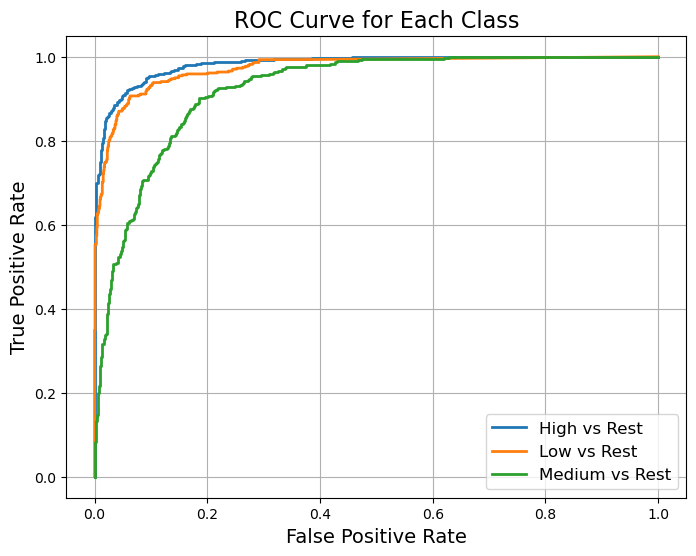

AUC for High vs Rest: 0.9830
AUC for Low vs Rest: 0.9727
AUC for Medium vs Rest: 0.9227
Thresholds :  {'high': 0.7263187502279798, 'low': 0.3567304985018067, 'medium': 0.39061371188314836}


In [45]:
#before fine tuning
thresholds = plot_graphs_knn(knn, X_train_final, y_train, 0.80)
print("Thresholds : ", thresholds)

Selected threshold for High: 0.8255
Precision at selected threshold: 0.9836
Recall at selected threshold: 0.8361

Selected threshold for Low: 0.3962
Precision at selected threshold: 0.9049
Recall at selected threshold: 0.8018

Selected threshold for Medium: 0.4151
Precision at selected threshold: 0.7764
Recall at selected threshold: 0.8106



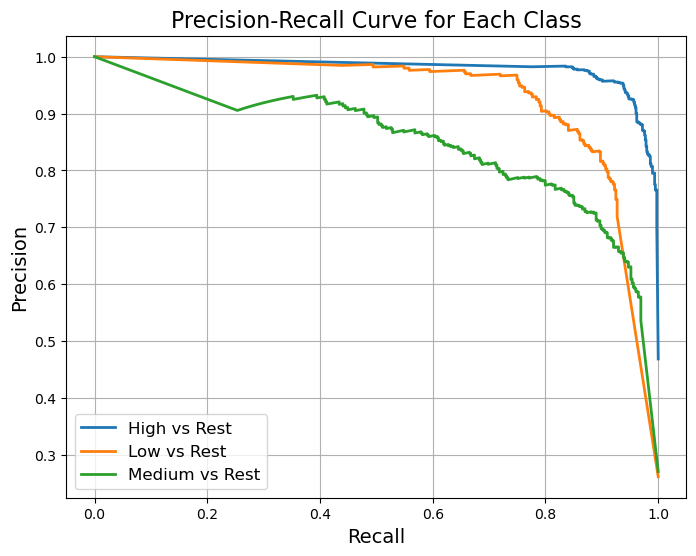

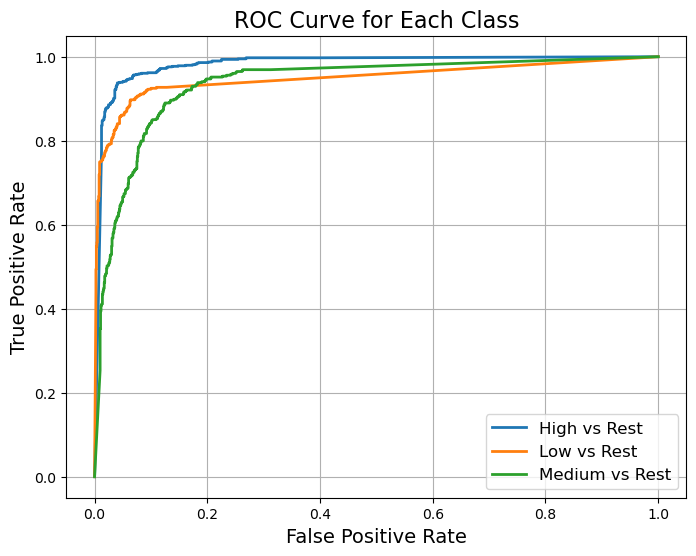

AUC for High vs Rest: 0.9824
AUC for Low vs Rest: 0.9487
AUC for Medium vs Rest: 0.9362
{'high': 0.8254871810470137, 'low': 0.39622488753029195, 'medium': 0.4151179648431072}


In [49]:
#after fine tuning
best_thresholds = plot_graphs_knn(best_model, X_train_final, y_train, 0.80)
print(best_thresholds)

# Apply threshold value on test set

In [51]:

def apply_threshold_knn(model, X_test, y_test, thresholds={'high': 0.5, 'low': 0.5, 'medium': 0.5}):
    
    y_scores_test = cross_val_predict(model, X_test, y_test, cv=5, method="predict_proba")
    
    classes = [x for x in thresholds]
    y_pred = []
    for i, class_label in enumerate(classes):
        threshold = thresholds[class_label]
        # Apply threshold for each class
        y_pred_class = (y_scores_test[:, i] >= threshold).astype(int)
        y_pred.append(y_pred_class)
    
    # Combine the binary decisions for all classes
    y_pred = np.column_stack(y_pred)
    
    # Get the index of the class with the maximum value (the predicted class)
    y_pred_final_idx = np.argmax(y_pred, axis=1)
    
    # Map the index back to the corresponding class labels
    y_pred_final = np.array(classes)[y_pred_final_idx]
    
    print("Thresholded Classification Report:")
    print(classification_report(y_test, y_pred_final, digits=4)) 

    conf_matrix = confusion_matrix(y_test, y_pred_final)
    print("Threshold Confusion Matrix:")
    print()
    print(conf_matrix)
    print()
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

Thresholded Classification Report:
              precision    recall  f1-score   support

        high     0.8980    0.9619    0.9288       787
         low     0.9049    0.8018    0.8502       439
      medium     0.7924    0.7819    0.7871       454

    accuracy                         0.8714      1680
   macro avg     0.8651    0.8485    0.8554      1680
weighted avg     0.8713    0.8714    0.8700      1680

Threshold Confusion Matrix:

[[757   4  26]
 [ 20 352  67]
 [ 66  33 355]]



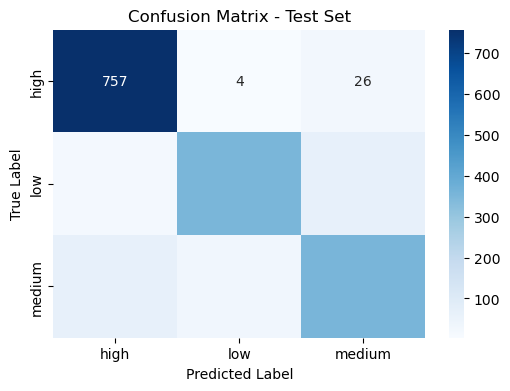

In [52]:
apply_threshold_knn(best_model, X_train_final, y_train, best_thresholds)

Thresholded Classification Report:
              precision    recall  f1-score   support

        high     0.8505    0.9167    0.8824       180
         low     0.7757    0.7034    0.7378       118
      medium     0.6723    0.6557    0.6639       122

    accuracy                         0.7810       420
   macro avg     0.7662    0.7586    0.7613       420
weighted avg     0.7777    0.7810    0.7783       420

Threshold Confusion Matrix:

[[165   3  12]
 [  8  83  27]
 [ 21  21  80]]



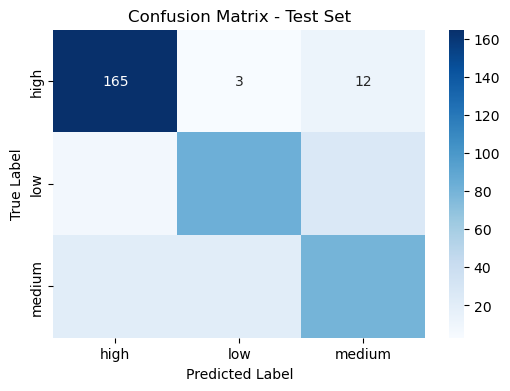

In [53]:
#using test set
apply_threshold_knn(best_model, X_test_final, y_test, best_thresholds)

# Final Results for the KNN best model 

Test Set Classification Report:
              precision    recall  f1-score   support

        high     0.9171    0.9833    0.9491       180
         low     0.9231    0.7119    0.8038       118
      medium     0.7647    0.8525    0.8062       122

    accuracy                         0.8690       420
   macro avg     0.8683    0.8492    0.8530       420
weighted avg     0.8745    0.8690    0.8668       420

Test Set Confusion Matrix:

[[177   1   2]
 [  4  84  30]
 [ 12   6 104]]



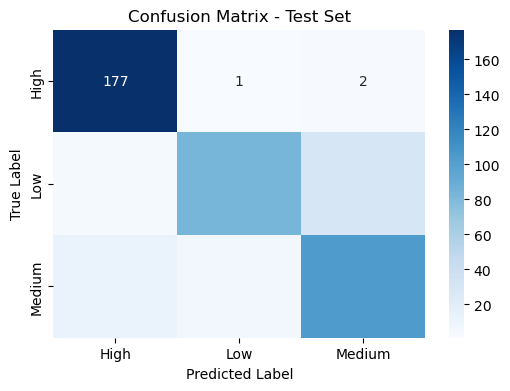

In [54]:
evaluate_test_model(best_model, X_test_final, y_test)

Selected threshold for High: 0.6108
Precision at selected threshold: 0.9515
Recall at selected threshold: 0.8722

Selected threshold for Low: 0.2066
Precision at selected threshold: 0.7021
Recall at selected threshold: 0.8390

Selected threshold for Medium: 0.3933
Precision at selected threshold: 0.6049
Recall at selected threshold: 0.8033



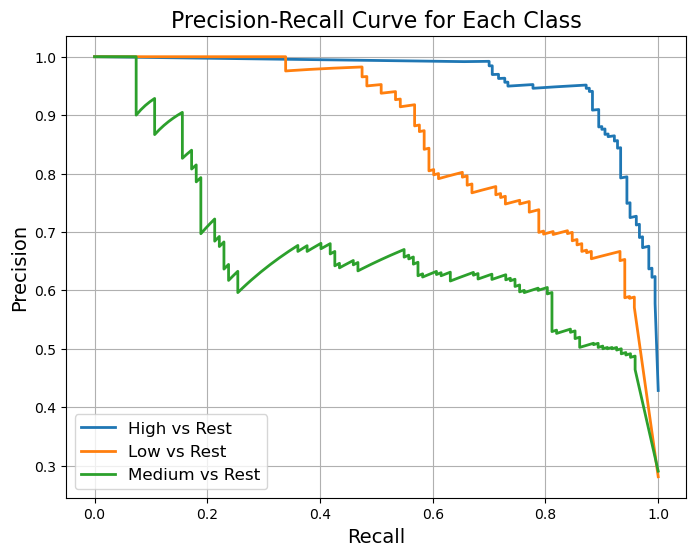

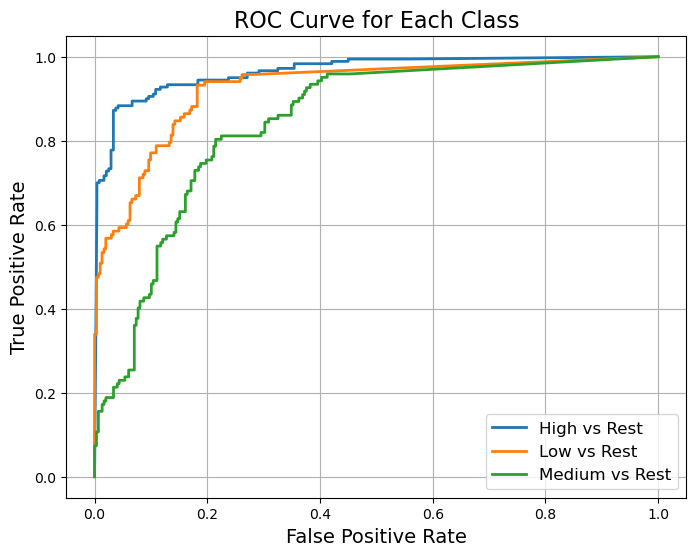

AUC for High vs Rest: 0.9652
AUC for Low vs Rest: 0.9255
AUC for Medium vs Rest: 0.8439


{'high': 0.6107620357708876,
 'low': 0.20661567549029983,
 'medium': 0.39327161657215565}

In [55]:
plot_graphs_knn(best_model, X_test_final, y_test)